## Importing the Python Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

## Load the Dataset

In [85]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,14246.0,7.382656e+01,0.003661,73.821195,73.822785,73.828663,73.829445,7.383139e+01
Latitude,14246.0,1.850857e+01,0.005242,18.501504,18.504085,18.507860,18.513463,1.851871e+01
Speed,14246.0,7.718982e-01,0.705439,0.000000,0.000000,0.760000,1.220000,2.712000e+00
Distance,14246.0,2.795223e+03,120598.784322,0.000000,448.081505,1007.368700,1645.653275,8.312031e+06
Acc X,14246.0,-1.136666e-03,1.030982,-8.805807,-0.378820,-0.013089,0.362683,1.048863e+01
Acc Y,14246.0,1.802373e-01,0.837260,-8.476646,-0.126690,0.167227,0.478868,1.101326e+01
Acc Z,14246.0,-2.357613e-02,1.768811,-17.320633,-0.701545,-0.025761,0.674922,1.972580e+01
Heading,14246.0,1.712691e+02,105.496919,0.000000,77.000000,150.000000,249.000000,3.590000e+02
gyro_x,14246.0,-1.318720e-03,0.141039,-2.062668,-0.046690,-0.002219,0.044939,1.611687e+00
gyro_y,14246.0,-6.521074e-03,0.087850,-0.571912,-0.033272,-0.005783,0.021706,5.995846e-01


## Using Isolation Forest for outliers detection 

Final Accuracy: 0.4916
Final Precision: 0.9191
Final Recall: 0.1491
Final F1 Score: 0.2565


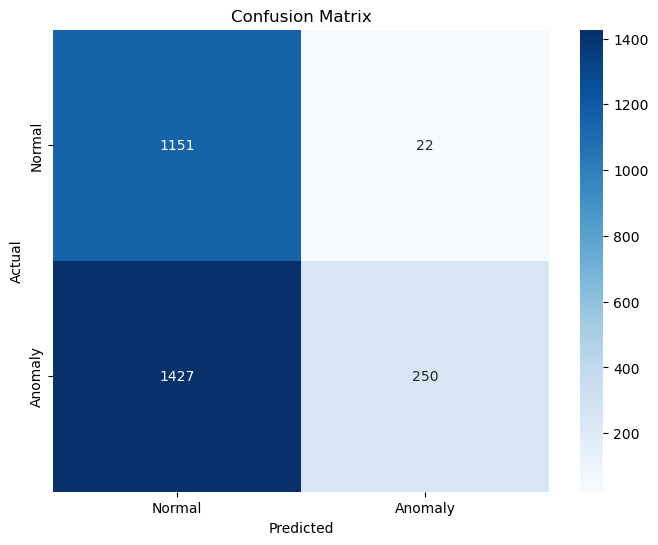

In [126]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)

# Obtain predictions for the test set
y_pred_if = iso_forest.predict(X_test_scaled)
y_pred_if = np.where(y_pred_if == -1, 1, 0)  # Convert -1 to 1 (anomalies) and 1 to 0 (normal)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_if)
final_precision = precision_score(y_test, y_pred_if)
final_recall = recall_score(y_test, y_pred_if)
final_f1 = f1_score(y_test, y_pred_if)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_if)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Performing Hyperparameter tuning for optimal performance

Best Parameters: {'contamination': 0.1, 'max_samples': 0.5, 'n_estimators': 300}


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


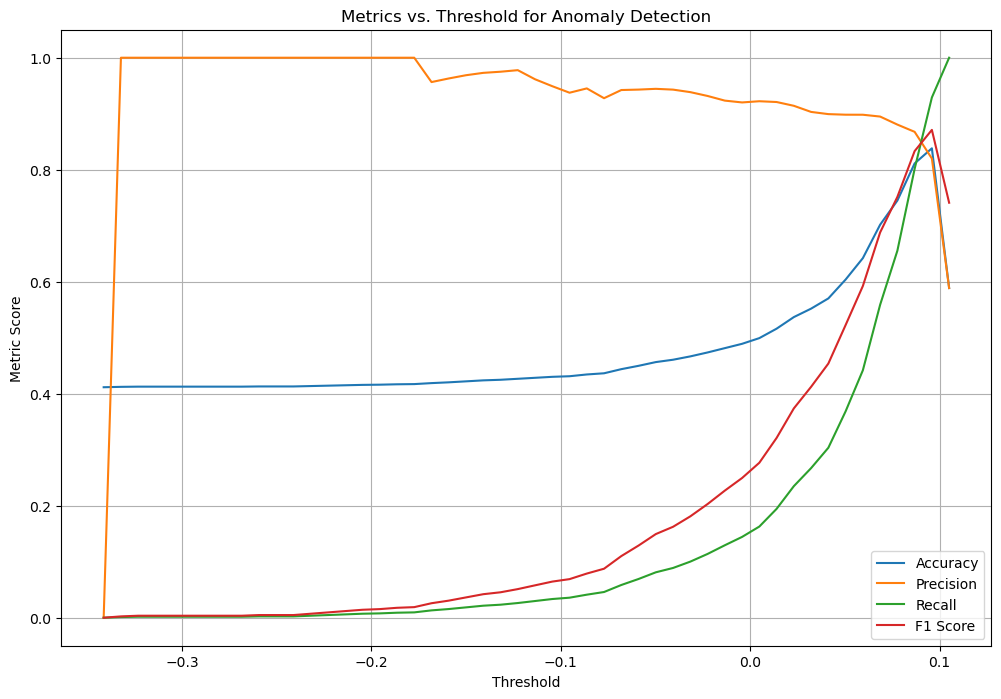

Best Threshold: 0.09592360120937166
Final Accuracy: 0.8382
Final Precision: 0.8200
Final Recall: 0.9290
Final F1 Score: 0.8711


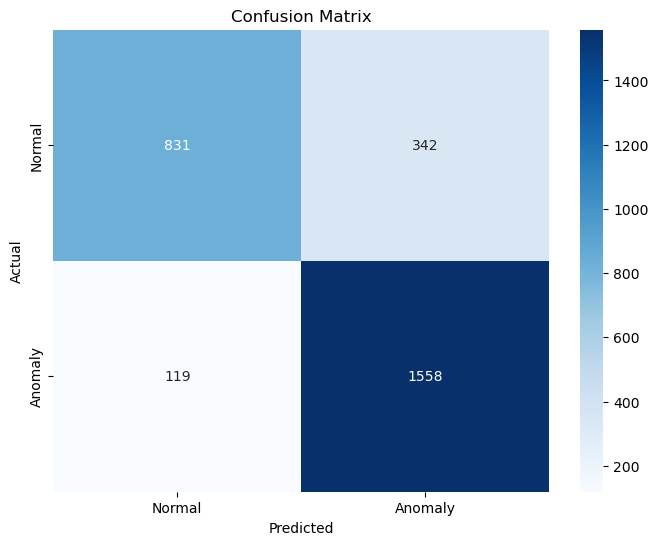

              precision    recall  f1-score   support

      Normal       0.87      0.71      0.78      1173
     Anomaly       0.82      0.93      0.87      1677

    accuracy                           0.84      2850
   macro avg       0.85      0.82      0.83      2850
weighted avg       0.84      0.84      0.83      2850



In [132]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom scorer for GridSearchCV
def anomaly_f1_score(y_true, y_pred):
    return f1_score(y_true, (y_pred < 0).astype(int))

f1_scorer = make_scorer(anomaly_f1_score)

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the Isolation Forest model with hyperparameter tuning
param_grid = {'contamination': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300], 'max_samples': ['auto', 0.5, 0.75]}
iso_forest = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring=f1_scorer, cv=5)
iso_forest.fit(X_train, y_train)

# Best parameters
best_params = iso_forest.best_params_
print(f"Best Parameters: {best_params}")

# Fit the model with the best parameters
iso_forest = IsolationForest(**best_params, random_state=42)
iso_forest.fit(X_train)

# Obtain anomaly scores for the test set
anomaly_scores = iso_forest.decision_function(X_test)

# Evaluate different thresholds
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), 50)
metrics = {'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for threshold in thresholds:
    y_pred = (anomaly_scores < threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Threshold'].append(threshold)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('Metrics vs. Threshold for Anomaly Detection')
plt.legend()
plt.grid()
plt.show()

# Identify the best threshold
best_threshold = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Threshold']
print(f"Best Threshold: {best_threshold}")

# Set the best threshold for the test set
y_pred_best = (anomaly_scores < best_threshold).astype(int)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Anomaly']))

# Initialize an empty dictionary to store the metrics
model_metrics = {}

# Function to store the performance metrics for each model
def store_model_metrics(model_name, accuracy, precision, recall, f1):
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

store_model_metrics('IsolationForest', final_accuracy, final_precision, final_recall, final_f1)


## Ploting of scores

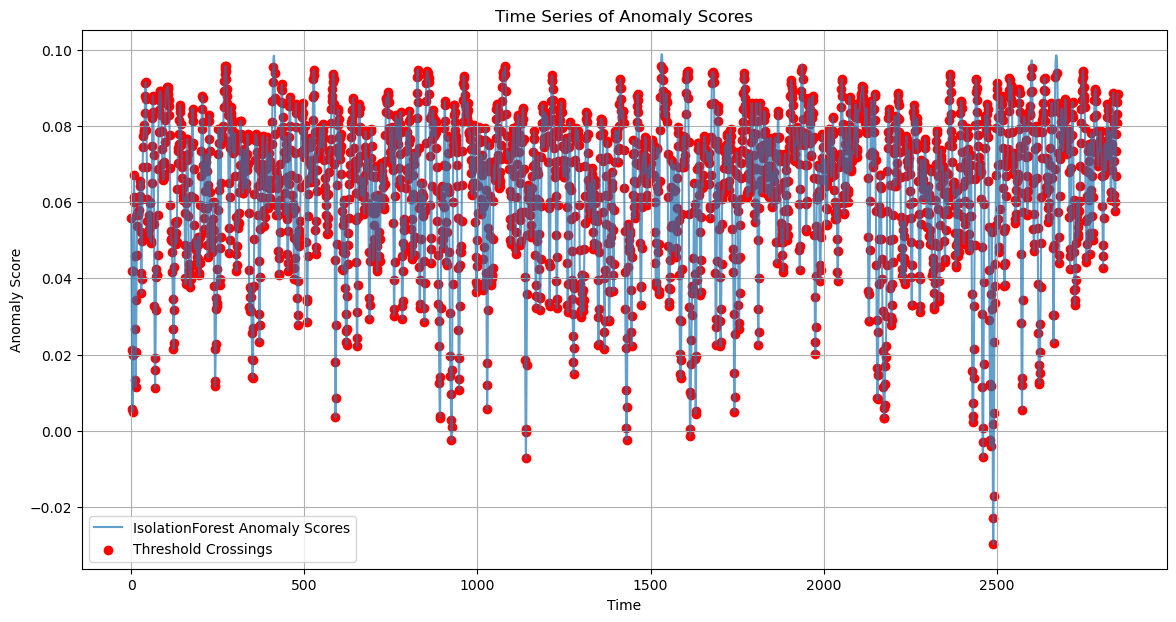

In [99]:
from scipy.ndimage import gaussian_filter1d

# Best Threshold value
best_threshold = 0.09592360120937166

# Apply smoothing to the anomaly scores for a more continuous appearance
smoothed_anomaly_scores = gaussian_filter1d(anomaly_scores, sigma=2)

# Identify points where the smoothed anomaly scores cross the threshold
threshold_points = np.where(smoothed_anomaly_scores < best_threshold)[0]

# Time series plot of smoothed anomaly scores with best threshold point
plt.figure(figsize=(14, 7))
plt.plot(smoothed_anomaly_scores, linestyle='-', alpha=0.7, label='IsolationForest Anomaly Scores')
plt.scatter(threshold_points, smoothed_anomaly_scores[threshold_points], color='red', marker='o', label='Threshold Crossings')
plt.title('Time Series of Anomaly Scores')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid()
plt.show()


## Local Outlier Factor

Best Parameters: {'leaf_size': 30, 'n_neighbors': 20}


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


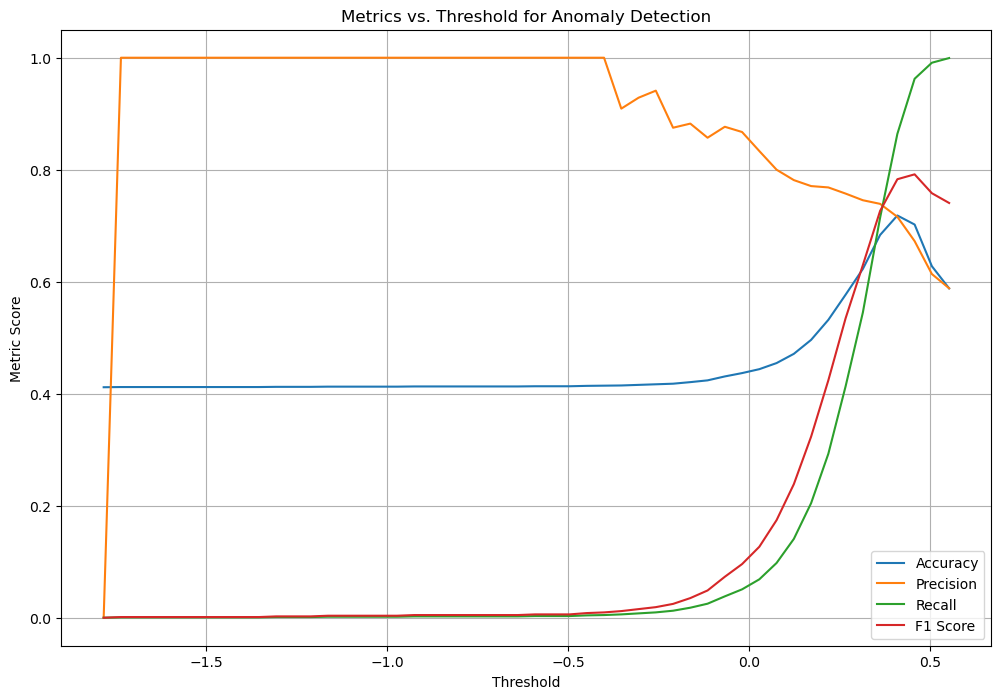

Best Threshold: 0.4094069672966829
Final Accuracy: 0.7182
Final Precision: 0.7159
Final Recall: 0.8640
Final F1 Score: 0.7830


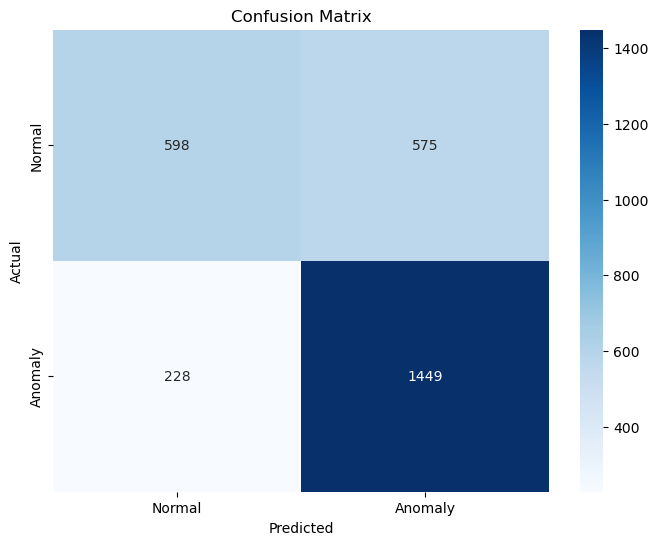

              precision    recall  f1-score   support

      Normal       0.72      0.51      0.60      1173
     Anomaly       0.72      0.86      0.78      1677

    accuracy                           0.72      2850
   macro avg       0.72      0.69      0.69      2850
weighted avg       0.72      0.72      0.71      2850



In [133]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom scorer for GridSearchCV
def anomaly_f1_score(y_true, y_pred):
    return f1_score(y_true, (y_pred < 0).astype(int))

f1_scorer = make_scorer(anomaly_f1_score)

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the Local Outlier Factor model with hyperparameter tuning
param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [30, 50, 70]}
lof = GridSearchCV(LocalOutlierFactor(novelty=True), param_grid, scoring=f1_scorer, cv=5)
lof.fit(X_train, y_train)

# Best parameters
best_params = lof.best_params_
print(f"Best Parameters: {best_params}")

# Fit the model with the best parameters
lof = LocalOutlierFactor(novelty=True, **best_params)
lof.fit(X_train)

# Obtain anomaly scores for the test set
lof_anomaly_scores = lof.decision_function(X_test)

# Evaluate different thresholds
thresholds = np.linspace(min(lof_anomaly_scores), max(lof_anomaly_scores), 50)
metrics = {'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for threshold in thresholds:
    y_pred = (lof_anomaly_scores < threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Threshold'].append(threshold)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('Metrics vs. Threshold for Anomaly Detection')
plt.legend()
plt.grid()
plt.show()

# Identify the best threshold
best_threshold = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Threshold']
print(f"Best Threshold: {best_threshold}")

# Set the best threshold for the test set
y_pred_best = (lof_anomaly_scores < best_threshold).astype(int)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('LocalOutlierFactor', final_accuracy, final_precision, final_recall, final_f1)


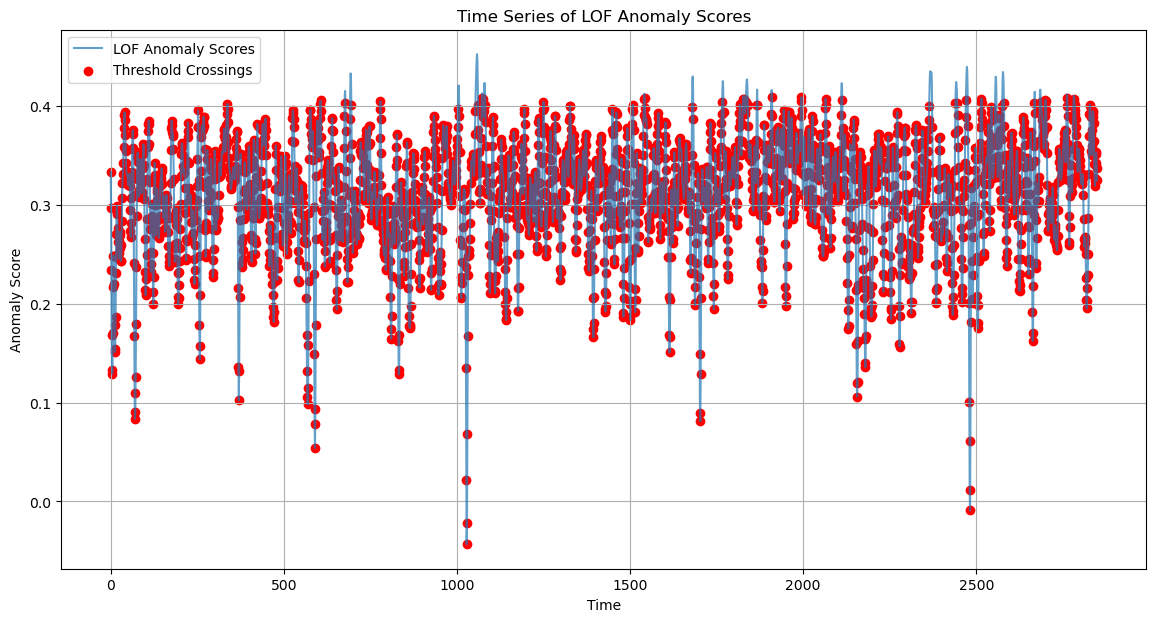

In [100]:
from scipy.ndimage import gaussian_filter1d

# Best Threshold value for LOF
best_threshold_lof = 0.4094069672966829

# Apply smoothing to the LOF anomaly scores for a more continuous appearance
smoothed_lof_anomaly_scores = gaussian_filter1d(lof_anomaly_scores, sigma=2)

# Identify points where the smoothed LOF anomaly scores cross the threshold
threshold_points_lof = np.where(smoothed_lof_anomaly_scores < best_threshold_lof)[0]

# Time series plot of smoothed LOF anomaly scores with best threshold points
plt.figure(figsize=(14, 7))
plt.plot(smoothed_lof_anomaly_scores, linestyle='-', alpha=0.7, label='LOF Anomaly Scores')
plt.scatter(threshold_points_lof, smoothed_lof_anomaly_scores[threshold_points_lof], color='red', marker='o', label='Threshold Crossings')
plt.title('Time Series of LOF Anomaly Scores')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid()
plt.show()


## KNN
Gradient Boosting is typically used for classification or regression tasks, but we can adapt it for anomaly detection by treating the problem as a binary classification task where one class represents normal data points and the other class represents anomalies. similar like this
KNeighborsClassifier is commonly used for classification tasks, but it can be adapted for anomaly detection. By treating the problem as a binary classification task, where one class represents normal data points and the other represents anomalies, the classifier learns to distinguish between the two based on their features. This approach leverages the distances to neighbors to identify outliers, making it effective for detecting anomalies in data.

Final Accuracy: 0.9189
Final Precision: 0.9335
Final Recall: 0.9284
Final F1 Score: 0.9309


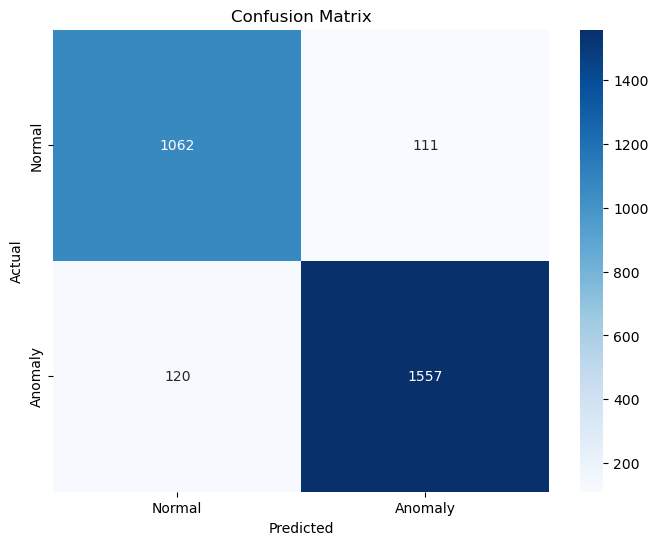

              precision    recall  f1-score   support

      Normal       0.90      0.91      0.90      1173
     Anomaly       0.93      0.93      0.93      1677

    accuracy                           0.92      2850
   macro avg       0.92      0.92      0.92      2850
weighted avg       0.92      0.92      0.92      2850



In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the k-Neighbors Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_knn)
final_precision = precision_score(y_test, y_pred_knn)
final_recall = recall_score(y_test, y_pred_knn)
final_f1 = f1_score(y_test, y_pred_knn)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_knn, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('KNeighborsClassifier(KNN)', final_accuracy, final_precision, final_recall, final_f1)

## Support Vector Classification (SVC)
We'll use Support Vector Classification (SVC) for anomaly detection. Even though SVC is typically used for classification tasks, we can adapt it for anomaly detection by training it to distinguish between normal and anomalous data points based on labeled data.

Final Accuracy: 0.9147
Final Precision: 0.9283
Final Recall: 0.9267
Final F1 Score: 0.9275


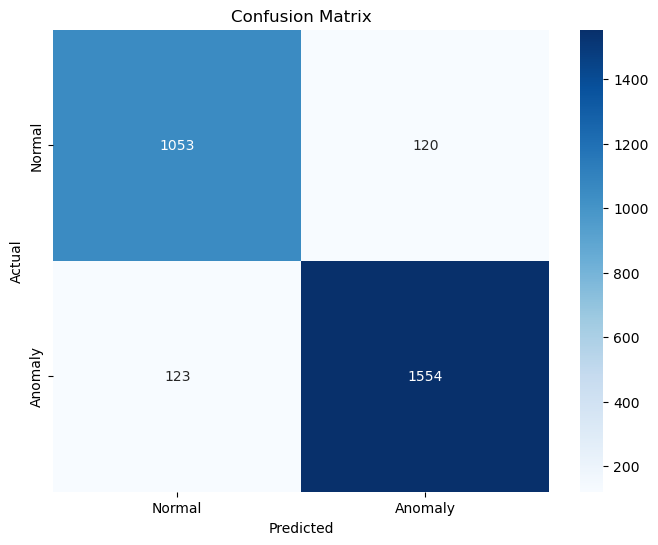

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90      1173
     Anomaly       0.93      0.93      0.93      1677

    accuracy                           0.91      2850
   macro avg       0.91      0.91      0.91      2850
weighted avg       0.91      0.91      0.91      2850



In [135]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the SVC model
svc = SVC(kernel='rbf', gamma='auto', probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_svc)
final_precision = precision_score(y_test, y_pred_svc)
final_recall = recall_score(y_test, y_pred_svc)
final_f1 = f1_score(y_test, y_pred_svc)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_svc, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('Support Vector Classification (SVC)', final_accuracy, final_precision, final_recall, final_f1)


## Gradient Boosting
Gradient Boosting is typically used for classification or regression tasks, but we can adapt it for anomaly detection by treating the problem as a binary classification task where one class represents normal data points and the other class represents anomalies.

Final Accuracy: 0.9786
Final Precision: 0.9764
Final Recall: 0.9875
Final F1 Score: 0.9819


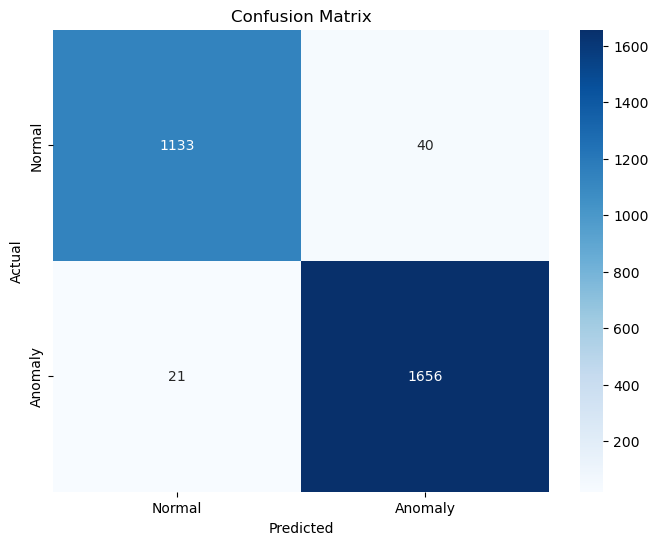

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97      1173
     Anomaly       0.98      0.99      0.98      1677

    accuracy                           0.98      2850
   macro avg       0.98      0.98      0.98      2850
weighted avg       0.98      0.98      0.98      2850



In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
y_pred_gbc = gbc.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_gbc)
final_precision = precision_score(y_test, y_pred_gbc)
final_recall = recall_score(y_test, y_pred_gbc)
final_f1 = f1_score(y_test, y_pred_gbc)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_gbc, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('Gradient Boosting', final_accuracy, final_precision, final_recall, final_f1)



## Comparison of Different Models

                                     Accuracy  Precision    Recall  F1 Score
IsolationForest                      0.838246   0.820000  0.929040  0.871121
LocalOutlierFactor                   0.718246   0.715909  0.864043  0.783032
KNeighborsClassifier(KNN)            0.918947   0.933453  0.928444  0.930942
Support Vector Classification (SVC)  0.914737   0.928315  0.926655  0.927484
Gradient Boosting                    0.978596   0.976415  0.987478  0.981915


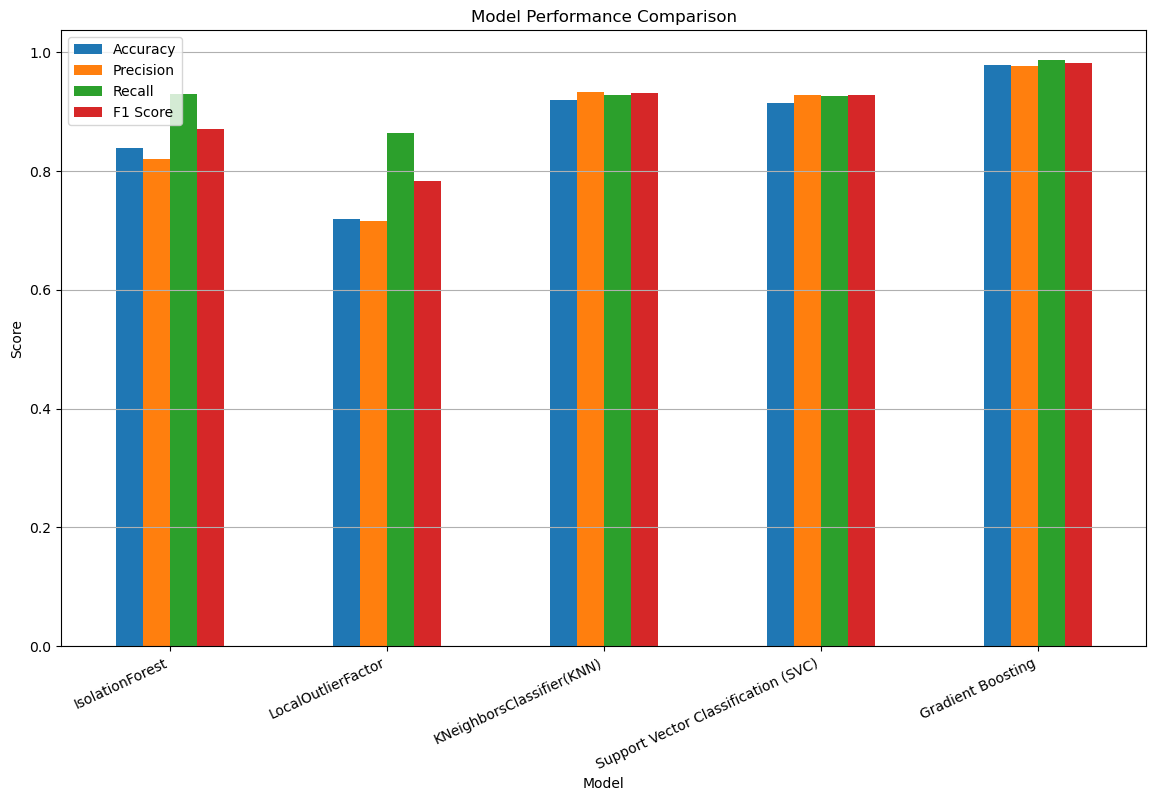

In [144]:
# Convert the model_metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to have models as rows

# Print the comparison table
print(metrics_df)

# Plot a bar graph for each metric
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y')
plt.show()
